In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Read the CSV and Perform Basic Data Cleaning

In [5]:
# Load the data

housing_df = pd.read_csv('Data\clean_merged_data.csv')

In [6]:
housing_df.head()

,City,Longitude,latitude,Population,median_age,median_income,median_house_value,total_rooms,Bedrooms,Households,ocean_proximity,max_temp,Humidity,Cloudiness,wind_speed,Description,County,Employees,Establishments
0,Mission Viejo,-117.66,33.61,789,16,8.4112,286900,2022,254,270,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
1,Mission Viejo,-117.66,33.62,1962,16,6.2177,256600,4065,661,636,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
2,Mission Viejo,-117.67,33.61,1972,24,5.7871,227400,3859,661,624,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
3,Mission Viejo,-117.66,33.61,1713,17,6.0471,248400,3464,519,530,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
4,Mission Viejo,-117.66,33.61,860,21,7.1497,274000,1932,266,286,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255


In [7]:
#drop unnecessary/low value columns 'Longitude','latitude','City','County'

housing_df.drop(['City', 'County','Longitude','latitude'],axis=1, inplace=True)


In [8]:
#convert categorical values

housing_df=pd.get_dummies(housing_df)
housing_df.head()

,Population,median_age,median_income,median_house_value,total_rooms,Bedrooms,Households,max_temp,Humidity,Cloudiness,...,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Description_broken clouds,Description_clear sky,Description_few clouds,Description_haze,Description_overcast clouds,Description_scattered clouds,Description_smoke,Description_thunderstorm
0,789,16,8.4112,286900,2022,254,270,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
1,1962,16,6.2177,256600,4065,661,636,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
2,1972,24,5.7871,227400,3859,661,624,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
3,1713,17,6.0471,248400,3464,519,530,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
4,860,21,7.1497,274000,1932,266,286,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# Split our preprocessed data into our features and target arrays
X = housing_df.drop(columns = ["median_house_value"])
y = housing_df['median_house_value']


In [10]:
# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=1/3)

In [11]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Gradient Boosting Regressor

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
# define the model
model_n_estimator_test_scores = []
model_n_estimator_train_scores = []
for n_estimator in range(10,1000,10):
    params = {
        "n_estimators": n_estimator,
        "random_state":1
    }
    model = GradientBoostingRegressor(**params)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    model_n_estimator_test_scores.append(model.score(X_test_scaled, y_test))
    model_n_estimator_train_scores.append(model.score(X_train_scaled, y_train))
    print(f'n_estimator val:{n_estimator}', f'test_score:{model.score(X_test_scaled, y_test)}', f'train_score:{model.score(X_train_scaled, y_train)}')



n_estimator val:10 test_score:0.5208932045959471 train_score:0.5330664308027662
n_estimator val:20 test_score:0.6145314509053361 train_score:0.6355438878652422
n_estimator val:30 test_score:0.6676813612361918 train_score:0.6909258863091023
n_estimator val:40 test_score:0.694391060874096 train_score:0.7211858860771299
n_estimator val:50 test_score:0.7122239127814519 train_score:0.7402520909871484
n_estimator val:60 test_score:0.7254921343319833 train_score:0.7555064848058283
n_estimator val:70 test_score:0.7351036238073215 train_score:0.7680345972445707
n_estimator val:80 test_score:0.7417210820621993 train_score:0.7771883708106675
n_estimator val:90 test_score:0.7457659521277669 train_score:0.7836100987310847
n_estimator val:100 test_score:0.7499700829124283 train_score:0.7896754386864497
n_estimator val:110 test_score:0.753075085183379 train_score:0.7953407125460307
n_estimator val:120 test_score:0.753801435911196 train_score:0.7988773984581292
n_estimator val:130 test_score:0.7565772

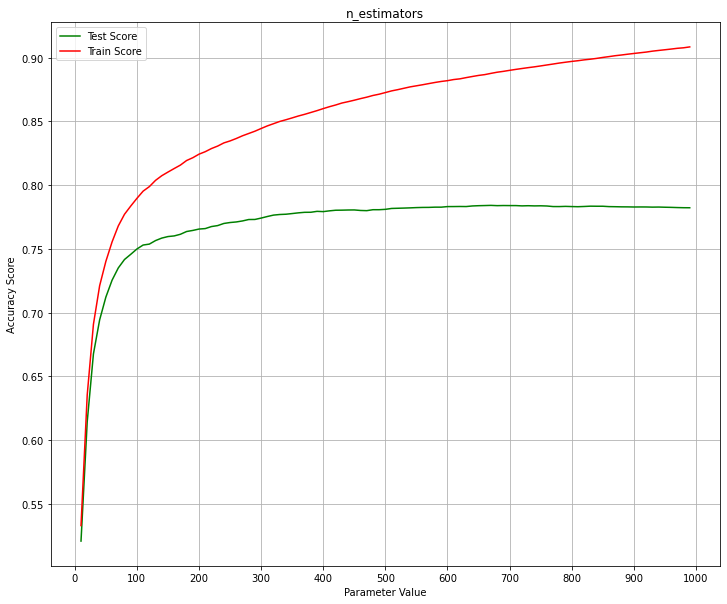

<Figure size 432x288 with 0 Axes>

In [14]:
#feature_importance = model.feature_importances_
#feature_importance

import matplotlib.pyplot as plt
import numpy as np
parameter_values = [x for x in range(10,1000,10)]

x = parameter_values
y = model_n_estimator_test_scores
y1 = model_n_estimator_train_scores

plt.figure(figsize=(12, 10))
plt.plot(x, y,color = "green")
plt.plot(x, y1,color = "red")
plt.xticks(np.arange(0, 1001, step=100))
plt.xlabel('Parameter Value')
plt.ylabel('Accuracy Score')
plt.title("n_estimators")
plt.grid()
plt.legend(['Test Score','Train Score'])
plt.show()
plt.savefig("n_estimators")

### Result : n_estimators indicates the total number of trees used in the model to arrive at the final result. Higher number of trees give us better performance but makes our code slower. As seen in the above graph, the accuracy score over the training set increases continuously with the increase in the hyperparameter value. On the other hand as the n_estimators value increases , the performance over the test set increases initially but after the n_estimators value 600, accuracy score becomes stagnant. Which means, even if we increase the value of n_estimators above 600, there is no major improvement in the accuracy level of test set. Since we were not gaining much improvement in the model's performance after a certain point, increase in the n_estimators value will not add any value to the model and will also make our model slower and probably overfitted too.


In [15]:
# define the model
max_depth_test_scores = []
max_depth_train_scores = []
for max_depth in range(2,50,2):
    params = {
        "n_estimators": 600,
        "max_depth":max_depth,
        "random_state":1
    }
    model = GradientBoostingRegressor(**params)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    max_depth_test_scores.append(model.score(X_test_scaled, y_test))
    max_depth_train_scores.append(model.score(X_train_scaled, y_train))
    print(f'max_depth val:{max_depth}', f'test_score:{model.score(X_test_scaled, y_test)}', f'train_score:{model.score(X_train_scaled, y_train)}')


max_depth val:2 test_score:0.7705856302353259 train_score:0.8222522530948722
max_depth val:4 test_score:0.7919801769403144 train_score:0.9306432856846195
max_depth val:6 test_score:0.7814318025197297 train_score:0.9852958807021889
max_depth val:8 test_score:0.7738728810681686 train_score:0.9989854102456205
max_depth val:10 test_score:0.7555317900755554 train_score:0.9999771624988174
max_depth val:12 test_score:0.7368350184694319 train_score:0.9999999386350699
max_depth val:14 test_score:0.7029111015545835 train_score:0.9999999999616619
max_depth val:16 test_score:0.664723223091677 train_score:0.9999999999999974
max_depth val:18 test_score:0.6257066163080964 train_score:1.0
max_depth val:20 test_score:0.6065405016455567 train_score:1.0
max_depth val:22 test_score:0.5849960471032302 train_score:1.0
max_depth val:24 test_score:0.5678977509650593 train_score:1.0
max_depth val:26 test_score:0.5604540638769671 train_score:1.0
max_depth val:28 test_score:0.5613452948009683 train_score:1.0
max

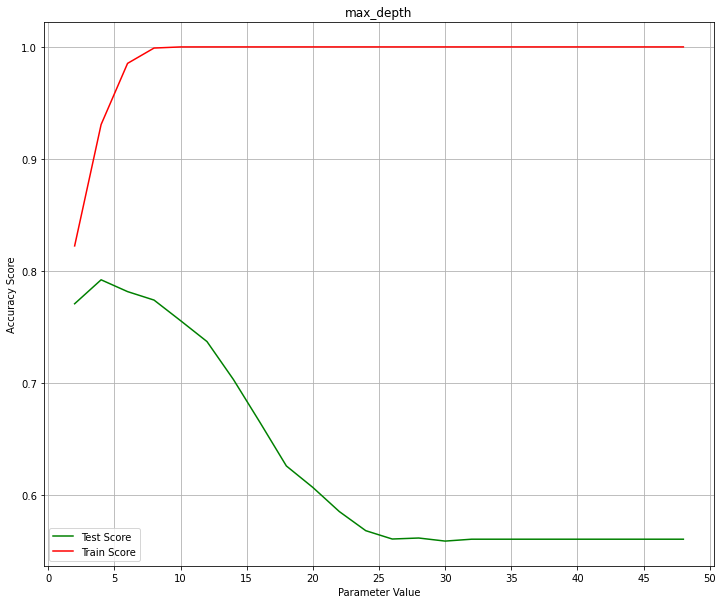

<Figure size 432x288 with 0 Axes>

In [16]:

max_depth_values = [x for x in range(2,50,2)]

x = max_depth_values
y = max_depth_test_scores
y1 = max_depth_train_scores

plt.figure(figsize=(12, 10))
plt.plot(x, y,color = "green")
plt.plot(x, y1,color = "red")
plt.xticks(np.arange(0, 51, step=5))
plt.xlabel('Parameter Value')
plt.ylabel('Accuracy Score')
plt.title("max_depth")
plt.legend(['Test Score','Train Score'])
plt.grid()
plt.show()
plt.savefig("max_depth")


### Result : max_depth indicates the maximum depth of a tree in the model. It is basically defined as longest path between the root node and the leaf node. Using the max depth, we can limit up to what depth we want every tree to grow. In the above graph, we can see that as the value of max depth increases, the performance of the model over training set increases continuously and eventually achieves the 100 % accuracy score. On the other hand as the max_depth value increases, the performance over the test set increases initially but after max_depth value 4, it starts to decrease rapidly. Which means that the tree starts to overfit the training set and therefore is not able to generalize over the unseen points in the test set.

In [17]:
# define the model
max_feature_test_scores = []
max_feature_train_scores = []
for max_feature in range(1,25,1):
    params = {
        "n_estimators": 600,
        "max_depth":4,
        "max_features":max_feature,
        "random_state":1
    }
    model = GradientBoostingRegressor(**params)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    max_feature_test_scores.append(model.score(X_test_scaled, y_test))
    max_feature_train_scores.append(model.score(X_train_scaled, y_train))
    print(f'max_features val:{max_feature}', f'test_score:{model.score(X_test_scaled, y_test)}', f'train_score:{model.score(X_train_scaled, y_train)}')


max_features val:1 test_score:0.7763722685357793 train_score:0.8542707049060141
max_features val:2 test_score:0.7860356156322141 train_score:0.8802375641672509
max_features val:3 test_score:0.7941669994576197 train_score:0.8946904269196729
max_features val:4 test_score:0.7887317643571896 train_score:0.9030957196844823
max_features val:5 test_score:0.7933886509305309 train_score:0.9110288544524688
max_features val:6 test_score:0.7957493466432817 train_score:0.9149517292837557
max_features val:7 test_score:0.7911228977006743 train_score:0.9178354221198209
max_features val:8 test_score:0.792811323599516 train_score:0.9192680045579456
max_features val:9 test_score:0.7933834914984865 train_score:0.9224541217148141
max_features val:10 test_score:0.792243551568659 train_score:0.9234403915531999
max_features val:11 test_score:0.7957588265193528 train_score:0.9233954971558661
max_features val:12 test_score:0.7932110836846049 train_score:0.9242253365461265
max_features val:13 test_score:0.795482

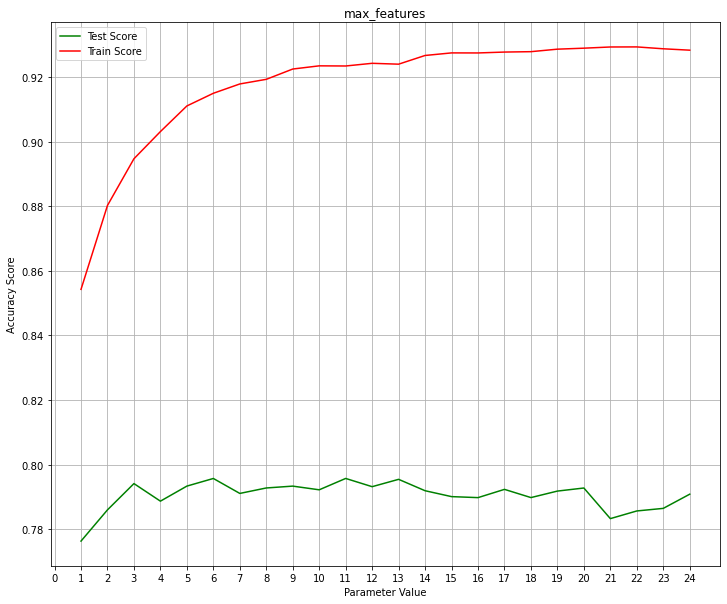

<Figure size 432x288 with 0 Axes>

In [18]:
max_features_values = [x for x in range(1,25,1)]

x = max_features_values
y = max_feature_test_scores
y1 = max_feature_train_scores

plt.figure(figsize=(12, 10))

plt.plot(x, y,color = "green")
plt.plot(x, y1,color = "red")
plt.xticks(np.arange(0, 25, step=1))
plt.xlabel('Parameter Value')
plt.ylabel('Accuracy Score')
plt.title("max_features")
plt.grid()
plt.legend(['Test Score','Train Score'])
plt.show()
plt.savefig("max_features")

### Result : max_features resembles the number of maximum features provided to each tree in a model. The model chooses some random samples from the features to find the best split. In the above graph, we can see that t as the value of max_features increases, the performance of the model over training set increases continuously.  On the other hand as the max_features value increases, the performance over the test set increases initially but after max_features value 6, performance is not showing much imrovement. Which means that the tree starts to overfit the training set and hence is not able to generalize over the unseen points in the test set.

In [19]:
params = {
        "n_estimators": 600,
    "max_depth": 4,
    "max_features": 6,
    "random_state": 1
     }
model = GradientBoostingRegressor(**params)
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)
print(f'model score is :{model.score(X_test_scaled, y_test)}')

model score is :0.7957493466432817


In [20]:
actual_prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
actual_prediction

,Actual,Predicted
9412,500001,399841.843420
9331,308900,266987.039417
4120,189800,218984.871501
10851,103600,110438.464869
618,366700,412853.115413
...,...,...
10120,137900,90443.126388
8009,500001,404346.682566
3005,156300,149652.573209
9492,179200,202255.180594


In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Gradient Boosting Regression training score: ',model.score(X_train_scaled, y_train))
print('Gradient Boosting testing score:  ',model.score(X_test_scaled, y_test))

Mean Absolute Error: 35059.19838688977
Mean Squared Error: 2638493346.476979
Root Mean Squared Error: 51366.26662000051
Gradient Boosting Regression training score:  0.9149517292837557
Gradient Boosting testing score:   0.7957493466432817


In [22]:
feature_importance = model.feature_importances_
feature_importance

array([5.29115929e-02, 2.24635344e-02, 3.98842216e-01, 5.39044987e-02,
       2.35619958e-02, 2.30139210e-02, 9.81060163e-02, 5.88467338e-02,
       6.92844171e-03, 2.43669587e-02, 3.93361501e-02, 9.24351052e-02,
       2.21697404e-02, 5.06601110e-02, 2.01586499e-04, 2.56044530e-03,
       1.27793465e-02, 1.00571028e-03, 3.19586008e-03, 6.40736503e-03,
       9.31688130e-06, 2.01931235e-03, 4.16169897e-03, 1.67303393e-05,
       9.56124003e-05])

In [23]:
sorted_idx = np.argsort(feature_importance)
sorted_idx

array([20, 23, 24, 14, 17, 21, 15, 18, 22, 19,  8, 16, 12,  1,  5,  4,  9,
       10, 13,  0,  3,  7, 11,  6,  2], dtype=int64)

In [24]:
sorted_feature_importance = np.sort(feature_importance)
sorted_feature_importance

array([9.31688130e-06, 1.67303393e-05, 9.56124003e-05, 2.01586499e-04,
       1.00571028e-03, 2.01931235e-03, 2.56044530e-03, 3.19586008e-03,
       4.16169897e-03, 6.40736503e-03, 6.92844171e-03, 1.27793465e-02,
       2.21697404e-02, 2.24635344e-02, 2.30139210e-02, 2.35619958e-02,
       2.43669587e-02, 3.93361501e-02, 5.06601110e-02, 5.29115929e-02,
       5.39044987e-02, 5.88467338e-02, 9.24351052e-02, 9.81060163e-02,
       3.98842216e-01])

In [25]:
pos = np.arange(sorted_idx.shape[0]) + 0.5
pos

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5])

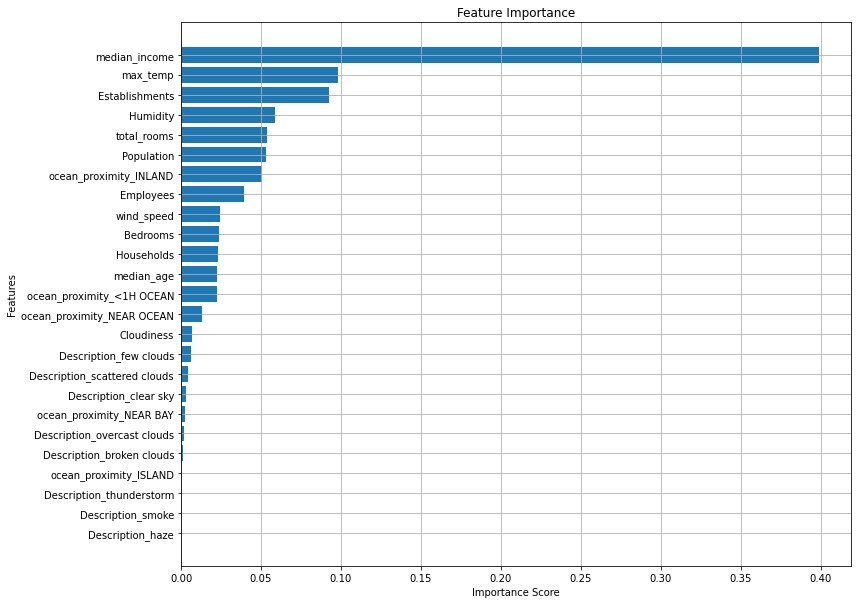

In [26]:
fig = plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.grid()
plt.savefig("Feature_importance")